In [63]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy
import cartopy.crs as crs
import cartopy.feature as cf
from cartopy.feature import NaturalEarthFeature
import glob
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, ALL_TIMES)
import numpy as np
import xarray as xr
import pandas as pd
import datetime
import netCDF4
import math
#per trasformare in kg/m3 moltiplico per la densità dell'aria:1.225kg/m3

In [64]:
##normal data
ncfile = Dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley_2/nest-POVALLEY1/wrfout_d01_2017-07-01_00:00:00")
data1 = xr.open_dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley_2/nest-POVALLEY1/out.QCLOUD.nc")
geog = xr.open_dataset('/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley/nest-POVALLEY4/WRF_OUTPUT/geog_POVALLEY4.nc')

In [65]:
#off data
ncfile_off = Dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley_shipoff/nest-POVALLEY1/wrfout_d01_2017-07-01_00:00:00")
data1_off = xr.open_dataset("/scratch/project_2005956/GC/CHIMERE/chimere_out_online_povalley_shipoff/nest-POVALLEY1/out.QCLOUD.nc")

In [66]:
qc_join = data1.QCLOUD
h_layer = getvar(ncfile, "height_agl")

In [67]:
ds_sea = geog.LANDUSEF[:,16,:,:]
ds_mask = geog.HGT_M[0,:,:]

In [68]:
qc_join_off = data1_off.QCLOUD
h_layer_off = getvar(ncfile_off, "height_agl")

In [62]:
mean_qc = qc_join.sum('bottom_top')
mean_time_qc = mean_qc.sum('Time')
mean_qc_off = qc_join_off.sum('bottom_top')
mean_time_qc_off = mean_qc_off.sum('Time')
diff_qc = mean_time_qc - mean_time_qc_off 
diff_rel_qc = (mean_time_qc - mean_time_qc_off)/mean_time_qc_off 

In [63]:
# Create a boolean mask for elements greater than the threshold
mask_max = diff_qc >= 0.5e-1

# Use the mask to set values above the threshold to the replacement value
diff_qc = np.where(mask_max,  0.5e-1, diff_qc)
# Create a boolean mask for elements greater than the threshold
mask_min = diff_qc <= -0.5e-1

# Use the mask to set values above the threshold to the replacement value
diff_qc = np.where(mask_min,  -0.5e-1, diff_qc)

Text(0.5, 1.0, 'TIME INTEGRATE QCLOUD ABSOLUTE DIFFERENCE')

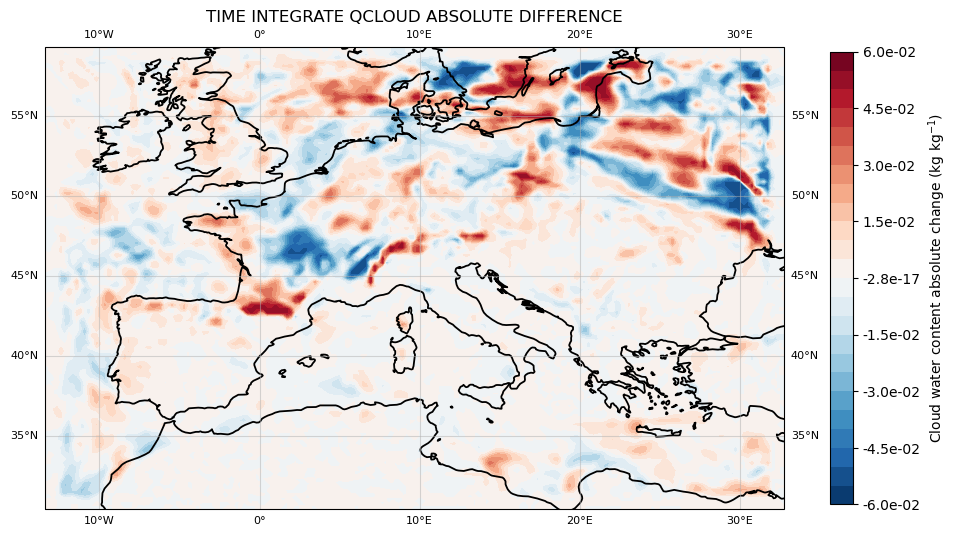

In [64]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

contour_levels = np.arange(-0.6e-1,0.60001e-1,0.5e-2)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(diff_qc),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='RdBu_r')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98, format='%.1e')
cbar.set_label('Cloud water content absolute change (kg kg$^{-1}$)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
#geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("TIME INTEGRATE QCLOUD ABSOLUTE DIFFERENCE")

In [16]:
np.max(diff_qc)

0.12

In [17]:
np.min(diff_qc)

-0.110963285

In [33]:
# Create a boolean mask for elements greater than the threshold
mask_max = mean_time_qc_off >= 0.8

# Use the mask to set values above the threshold to the replacement value
mean_time_qc_off = np.where(mask_max,  0.8, mean_time_qc_off)

Text(0.5, 1.0, 'VERTICAL AND TIME INTEGRATE QCLOUD SHIP OFF')

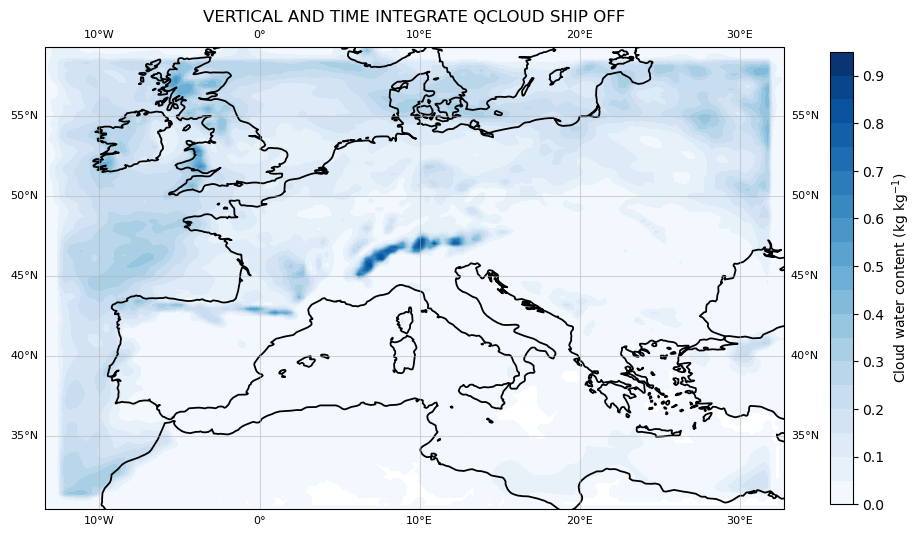

In [34]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

contour_levels = np.arange(0,1,0.05)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(mean_time_qc_off),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='Blues')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)#, format='%.1e')
cbar.set_label('Cloud water content (kg kg$^{-1}$)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
#geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("VERTICAL AND TIME INTEGRATE QCLOUD SHIP OFF")

In [35]:
# Create a boolean mask for elements greater than the threshold
mask_max = mean_time_qc >= 0.8

# Use the mask to set values above the threshold to the replacement value
mean_time_qc = np.where(mask_max,  0.8, mean_time_qc)

Text(0.5, 1.0, 'VERTICAL AND TIME INTEGRATE QCLOUD SHIP ON')

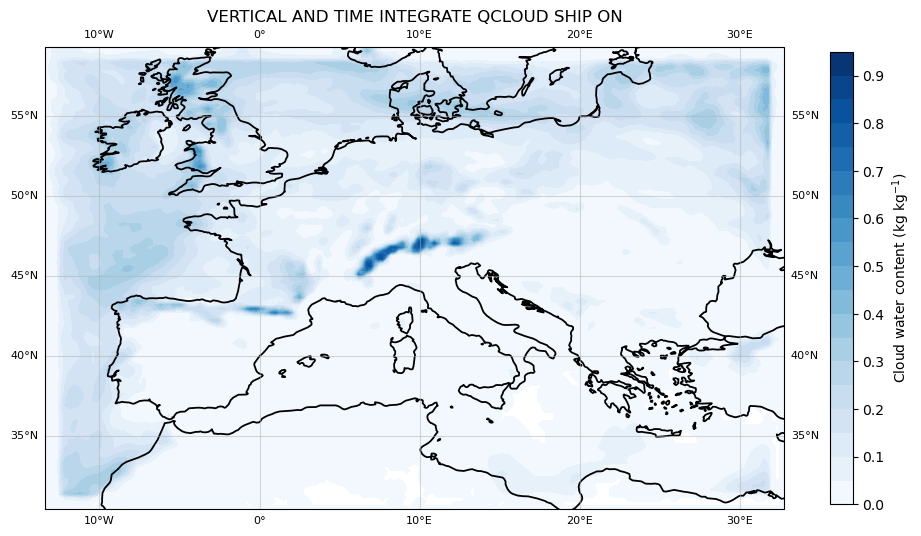

In [37]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

contour_levels = np.arange(0,1,0.05)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(mean_time_qc),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='Blues')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)#, format='%.1e')
cbar.set_label('Cloud water content (kg kg$^{-1}$)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
#geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("VERTICAL AND TIME INTEGRATE QCLOUD SHIP ON")

Text(0.5, 1.0, 'TIME INTEGRATE QCLOUD ABSOLUTE DIFFERENCE')

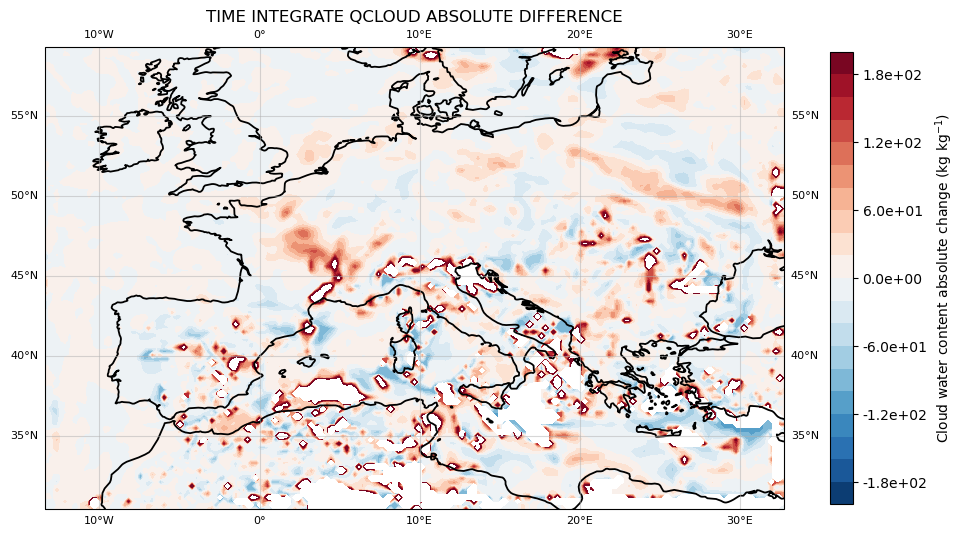

In [51]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

contour_levels = np.arange(-200,200.0001,20)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(diff_rel_qc*100),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='RdBu_r')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98, format='%.1e')
cbar.set_label('Cloud water content absolute change (kg kg$^{-1}$)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
#geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("TIME INTEGRATE QCLOUD ABSOLUTE DIFFERENCE")

In [53]:
vettore_on = np.ravel(qc_join)
vettore_off = np.ravel(qc_join_off)

In [54]:
vettore_on = vettore_on[vettore_on>=0.00001]
vettore_off = vettore_off[vettore_off>=0.00001]

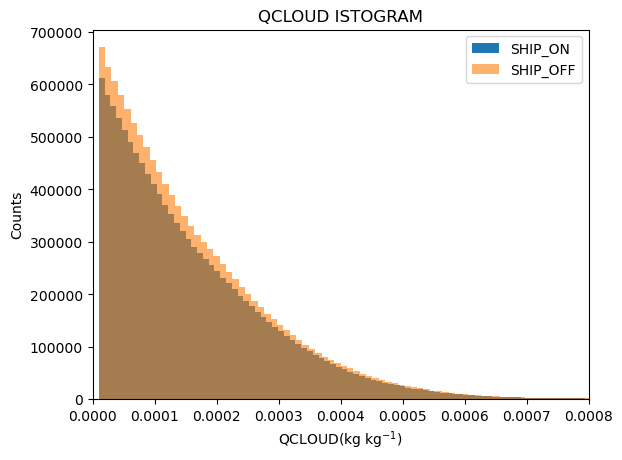

In [56]:
plt.hist(vettore_on, 200, label = 'SHIP_ON')#, density = True)
plt.hist(vettore_off, 200,alpha = 0.6, label = 'SHIP_OFF')#, density = True)
plt.xlim(0,0.0008)
#plt.ylim(0,6000)
plt.ylabel('Counts')
plt.xlabel('QCLOUD(kg kg$^{-1}$)')
plt.title("QCLOUD ISTOGRAM")
plt.legend()

In [ ]:
conts, bins = np.histogram(qc_join,np.arange(qc_join.min(), qc_join.max()+1 ))
conts_off, bins_off =  np.histogram(qc_join_off, np.arange(qc_join_off.min(), qc_join_off.max()+1 ))

In [ ]:
plt.bar(bins[:-1], conts, width=np.diff(bins), label = 'BIO_ON')
plt.bar(bins_off[:-1], conts_off, width=np.diff(bins_off), label = 'BIO_off', alpha = 0.7 )
plt.xlim(0, 1)
plt.legend()

In [ ]:
vettore_on = np.ravel(qc_join)
vettore_off = np.ravel(qc_join)

In [ ]:
plt.hist(vettore_on,100, density=True ) 
plt.xlim(0,0.00004)

In [ ]:
domain_sum =np.sum(qc_join, axis =(1,2,3))
domain_sum_off =np.sum(qc_join_off, axis =(1,2,3))

In [ ]:
plt.hist(domain_sum, 100, density = True, label = 'BIO_ON')
plt.hist(domain_sum_off, 100,alpha = 0.7, density = True, label = 'BIO_off')
plt.xlim(0,0.01)
plt.legend()

In [ ]:
domain_mean =np.mean(qc_join, axis =(1,2,3))
domain_mean_off =np.mean(qc_join_off, axis =(1,2,3))

In [ ]:
plt.hist(domain_mean, 500, density = True, label = 'BIO_ON')
plt.hist(domain_mean_off, 500,alpha = 0.7, density = True, label = 'BIO_off')
plt.xlim(0,0.1e-6)
plt.legend()

In [ ]:
domain_sum = np.reshape(domain_sum,-1)
domain_sum_off = np.reshape(domain_sum_off,-1)

In [ ]:
domain_sum = domain_sum[domain_sum>=0.001]
domain_sum_off = domain_sum_off[domain_sum_off>=0.001]

In [ ]:
plt.hist(domain_sum, 300, label = 'BIO_ON')
plt.hist(domain_sum_off, 300,alpha = 0.7, label = 'BIO_off')
plt.xlim(0,0.3)
plt.ylabel('Counts')
plt.xlabel('QCLOUD domain integration')
plt.legend()

In [ ]:
domain_sum

In [57]:
sum = np.sum(qc_join, axis=(0,1,2,3))
sum_off = np.sum(qc_join_off, axis=(0,1,2,3))

In [58]:
sum

<xarray.DataArray 'QCLOUD' ()>
array(1925.9436, dtype=float32)

In [59]:
sum_off

<xarray.DataArray 'QCLOUD' ()>
array(1928.2043, dtype=float32)

Text(0.5, 1.0, 'QCLOUD INTEGRATION')

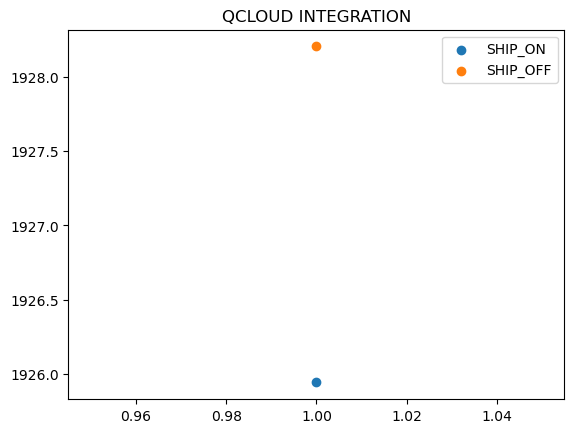

In [61]:
plt.scatter([1],sum,label='SHIP_ON')
plt.scatter([1],sum_off,label='SHIP_OFF')
plt.legend()
plt.title('QCLOUD INTEGRATION')

In [69]:
qc_join = qc_join[511:802,:,:,:]  
qc_join_off = qc_join_off[511:802,:,:,:]  

In [70]:
mean_qc = qc_join.sum('bottom_top')
mean_time_qc = mean_qc.sum('Time')
mean_qc_off = qc_join_off.sum('bottom_top')
mean_time_qc_off = mean_qc_off.sum('Time')
diff_qc = mean_time_qc - mean_time_qc_off 
diff_rel_qc = (mean_time_qc - mean_time_qc_off)/mean_time_qc_off 

In [48]:
# Create a boolean mask for elements greater than the threshold
mask_max = diff_qc >= 0.2e-1

# Use the mask to set values above the threshold to the replacement value
diff_qc = np.where(mask_max,  0.2e-1, diff_qc)
# Create a boolean mask for elements greater than the threshold
mask_min = diff_qc <= -0.2e-1

# Use the mask to set values above the threshold to the replacement value
diff_qc = np.where(mask_min,  -0.2e-1, diff_qc)

Text(0.5, 1.0, 'TIME INTEGRATE QCLOUD ABSOLUTE DIFFERENCE')

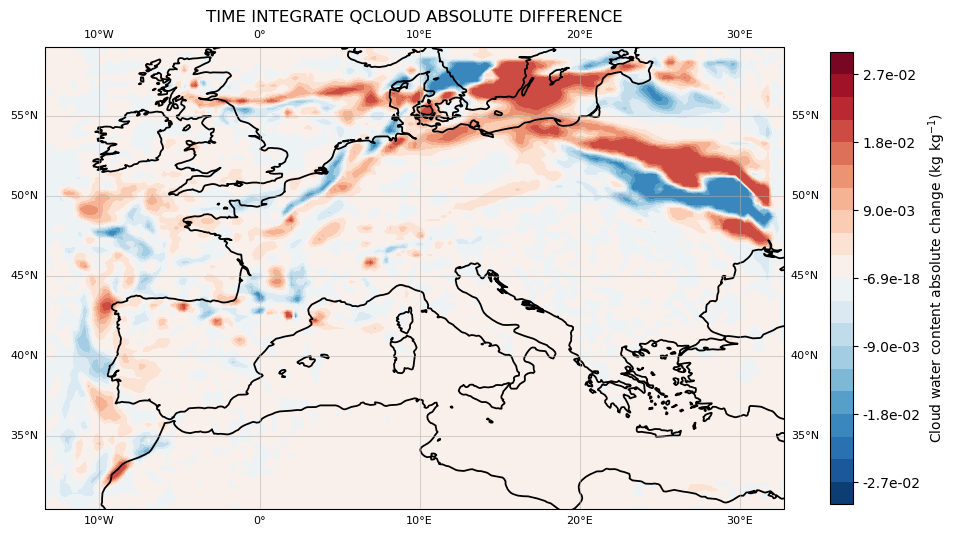

In [49]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

contour_levels = np.arange(-0.3e-1,0.30001e-1,0.3e-2)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(diff_qc),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='RdBu_r')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98, format='%.1e')
cbar.set_label('Cloud water content absolute change (kg kg$^{-1}$)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
#geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("TIME INTEGRATE QCLOUD ABSOLUTE DIFFERENCE")

In [71]:
diff_rel_qc = np.where(diff_rel_qc<= -1, -1, diff_rel_qc)
diff_rel_qc = np.where(diff_rel_qc>= 1, 1, diff_rel_qc)

Text(0.5, 1.0, 'TIME INTEGRATE QCLOUD RELATIVE DIFFERENCE')

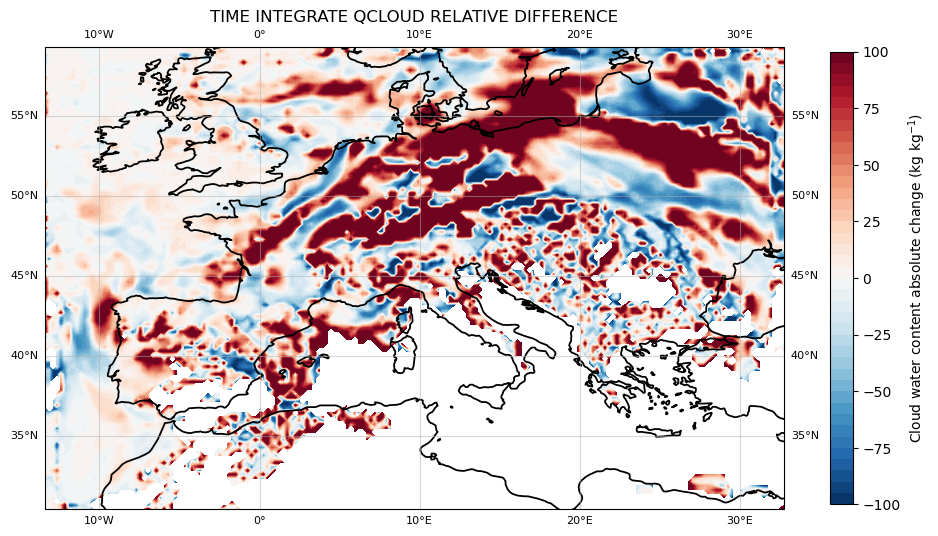

In [72]:
# Create a figure  
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(projection=crs.PlateCarree())
# Get the cartopy mapping object
cart_proj = get_cartopy(h_layer)

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)
# Set the GeoAxes to the projection used by WRF

contour_levels = np.arange(-100,100.0001,5)
# Make the contour outlines and filled contours for the smoothed sea level
# pressure.
# Make the contour filled plot for the smoothed sea level pressure.
contourf = plt.contourf(to_np(lons), to_np(lats), to_np(diff_rel_qc*100),
                        transform=crs.PlateCarree(),
                        levels=contour_levels,
                        cmap='RdBu_r')

# Aggiungi la scala di colori con le etichette delle unità di misura
cbar = plt.colorbar(contourf, ax=ax, shrink=0.98)#, format='%.1e')
cbar.set_label('Cloud water content absolute change (kg kg$^{-1}$)')

# Add a color bar
levels = np.arange(10., 2500., 400.)
#geogr = ax.contour(geog.XLONG_M[0,:,:], geog.XLAT_M[0,:,:], ds_mask[:,:],transform=crs.PlateCarree(),levels=levels, colors='k', alpha=0.2)
ax.clabel(geogr, fontsize=7, inline=1,fmt = '%1.0f',colors='k')
ax.coastlines(color='k', linewidth = 1.3);
gl = ax.gridlines(draw_labels=True,alpha=0.5);
gl.xlabel_style = {'size': 8, 'color': 'k'}
gl.ylabel_style = {'size': 8, 'color': 'k'}

plt.title("TIME INTEGRATE QCLOUD RELATIVE DIFFERENCE")